# This File contains the implementation of Advanced Learning Algorithms.

Importing some basic libraries

In [21]:
import numpy as np
import math, copy

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import make_blobs
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import linear, relu, sigmoid
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1 - Neuros and Layers

In [19]:
linear_layer = Dense(units=1,activation="linear",) # Create a layer with single neuron

X_train = np.array([[1.0], [2.0]])
Y_train = np.array([[300.0], [500.0]])

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

w, b = linear_layer.get_weights()
print(f"w = {w} , b = {b}")

w_set = np.array([[200]])
b_set = np.array([100])

linear_layer.set_weights([w_set,b_set])
w, b = linear_layer.get_weights()
print(f"w = {w} , b = {b}")

tf.Tensor([[-1.07406]], shape=(1, 1), dtype=float32)
w = [[-1.07406]] , b = [0.]
w = [[200.]] , b = [100.]


Compare Neural Network output with regression model output

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

alin = np.dot(w_set,X_train[0].reshape(1,1)) + b_set
print(alin)

prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, w_set) + b_set



tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


Neuron with sigmoid activation

In [37]:
model = Sequential(
    [
        Dense(units = 1, input_dim = 1, activation = 'sigmoid', name = 'L1')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f"w = {w} , b = {b}")

set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
w, b = logistic_layer.get_weights()
print(f"w = {w} , b = {b}")

w = [[-1.0196903]] , b = [0.]
w = [[2.]] , b = [-4.5]


In [40]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

alog = sigmoid(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 16ms/step
[[0.07585818]]
tf.Tensor([[0.07585818]], shape=(1, 1), dtype=float64)


In [64]:
#Load Dataset
X = np.array([[185.31763812365773,12.693964573656494],[259.9204749802278,11.867663768540387],[231.0135710053633,14.414242107247178],[175.36664490449147,11.720586509332273],[187.12086466731515,14.12973205950237],[225.90586447535776,12.100249053221344],[208.40515675864629,14.17718919429808],[207.07593089146724,14.032737597096466],[280.6038535866463,14.2322592892385],[202.86935246580353,12.249010278880393],[196.70468985218398,13.54426389427831],[270.3132702825782,14.602255769890757],[192.94979108307552,15.196867586027297],[213.57283453112726,14.27503536880892],[164.4729866412344,11.918174233731765],[177.2575054164758,15.037798694753175],[241.7745473004188,14.896945294457739],[236.99889634274487,13.126169590702146],[219.73805620687455,13.873774071023625],[266.3859279625298,13.2527446646365],[270.4524148454968,13.95486775361035],[261.9630769838885,13.49222421966899],[243.4899477970464,12.85610149859724],[220.5818480297081,12.364893564076057],[163.59498627249437,11.654416519683876],[244.76317931210858,13.325722483526224],[271.1941098575787,14.84073281876912],[201.98784315491025,15.39471507882089],[229.92837149557923,14.563533256861191],[204.97123839474693,12.284679647873087],[173.18989703604765,12.224824904923947],[231.5137448304292,11.950531420445273],[152.6879510930519,14.831987856753681],[163.4205009209065,13.302338142207049],[215.94730736633585,13.98108963353425],[218.04195512421555,15.249372574915872],[251.3035402390422,13.797865991531863],[233.33173845521324,13.52620596642792],[280.24284419817286,12.406504253436546],[243.01866351505674,13.720386715591461],[155.67159152427263,12.684599999134935],[275.1675362792148,14.63825942972],[151.7321976266024,12.68650531865098],[151.32372212128612,14.809867771912312],[164.8996249617235,11.729820715099278],[282.5542513313383,13.283479517660854],[192.98305487359625,11.696053558252368],[202.59536338034098,12.964156229048553],[220.66990638748766,11.527141865925932],[169.9749888391795,12.339546102993625],[209.46811003107416,12.709213465239465],[232.79923632620387,12.641730422157181],[272.8004563613967,15.347479832792306],[158.02370683384683,12.336238876619916],[226.00812973954754,14.582640917935919],[158.64327122879146,12.23921073771952],[211.65721642824303,14.174763034200694],[271.94927014348957,14.9678918541662],[257.1569810814648,11.710928573506205],[281.8459265944453,13.958511796604627],[161.62563505219575,12.519715101559061],[233.80180141644928,13.042560467534559],[210.2914691912232,14.718340262395],[261.2441819509951,13.68714792072123],[256.98089904735,13.124019716372217],[281.5550480379854,13.920636661704144],[280.6392276627205,11.675950768225588],[269.16350813376454,13.737508750179506],[246.34126917943763,12.27037990151608],[224.07333575878408,12.657111696487677],[164.23986437700543,11.512747082472469],[272.42340268172154,14.18361726014331],[177.6779337749785,12.531274710250976],[212.85523205543603,14.773149013077894],[165.87945638859475,15.371139320654919],[277.4279534676567,12.478640382770534],[236.50555103276065,12.940390131064344],[244.13865150825384,11.847664400591015],[213.44539382786763,13.853963214760375],[234.57422434983218,14.271181896686253],[270.33648535513584,12.465000839629704],[170.68123283998017,13.062427748851903],[226.79179993803092,15.342115043682218],[245.91825405821646,14.453770202678516],[281.31680226443416,12.57097265103436],[185.02731944599353,13.190163350275608],[189.88170100166397,14.104413540913876],[278.48137931063735,12.114045970144097],[219.92293709971818,14.210312395192949],[216.57898498845285,15.15497536357607],[249.48122813719687,15.028707182442275],[165.08827339607947,12.283054013986838],[158.8700704564876,14.817277993858738],[279.9805193437852,11.555964084113734],[256.54924192266276,14.411324794111898],[272.6052172420259,12.581541893037603],[246.49491974773906,12.44969152587688],[160.2644820060435,14.480816250813096],[155.69875113941342,14.298377852630496],[188.26743273481935,13.44969358033831],[270.3569757726322,12.473631516000852],[213.22379155065659,12.920197788160978],[175.7014197283934,13.3946058733705],[174.52009414654242,14.69602996663428],[233.00092161976346,12.632523011343407],[281.3691743606422,12.881107377874972],[240.6196492618556,14.432894905937017],[185.80556267384637,11.54705520635124],[270.5031433454736,15.325666054366515],[172.9807912614288,12.114420844495411],[208.41010162485875,13.890278272598966],[283.51265469325926,15.353984469423763],[283.3601333927059,12.482277660949709],[230.84923224189154,13.243476574854926],[181.23930992461385,11.761509482866865],[172.77833045706768,12.933806915144826],[161.88293361414617,12.102955965479822],[156.02795049793286,13.991625094768693],[216.51672478192378,12.474212012399576],[221.0570798355102,13.197787110623912],[238.98568520018682,15.230668878991835],[197.6944343739337,14.080606130699557],[179.55375965839255,15.259597596063937],[233.38848486508607,12.134989750401584],[184.70189322163776,12.13660544245415],[174.1830946534081,12.72719542667368],[261.1145098270051,13.32823520652449],[187.41794560696474,13.176303443070145],[186.09876106325586,14.434729664693174],[157.93546834639034,12.656914240589117],[193.63822190218158,12.226078074717979],[249.65103075660312,12.220989450434844],[190.56498131738326,11.725906248510729],[252.00406101766478,12.955452066489801],[238.5503330231537,12.368944408787026],[152.94302628637445,12.78967263403881],[255.17362012759682,14.849783121859982],[197.0933671229322,14.887763114166347],[156.79710499295106,13.5884581442939],[184.7520262047317,13.256310754802325],[179.92164591974054,15.074266487197118],[190.79357984301413,15.281167708142997],[164.7271741542562,13.219324024518682],[209.86506596128294,14.337739172089272],[196.5780064220703,13.469979854431436],[159.510623172614,12.744125834662189],[247.87288291184055,11.9236455676461],[212.44231568694744,12.446907818273253],[172.34040751845203,11.98526205043424],[259.8719001968305,14.246628078158885],[201.22657353944328,13.066563771293861],[248.34175919001873,13.915824598478073],[273.66206057956043,15.177654744928303],[215.0935848814562,14.136541027876753],[223.53014138129097,12.741142166812214],[211.22431235280325,14.384703456843148],[224.6120906119603,14.029625465786433],[215.75489519873088,15.311910571776721],[254.82229579531514,12.02314013487207],[259.9047835847929,15.170310305641612],[260.2488557726487,12.87243299110953],[199.66771450418645,12.472857481264143],[157.52013585298806,13.388245382462747],[264.81482409816533,14.575246344636167],[239.3968517064999,14.888762677733132],[238.98037311101996,12.393333660898925],[258.42593537030615,12.970080017838821],[270.15836598717624,12.80593012341884],[162.40676332878297,14.419592780232279],[164.53231153619822,14.980857716307591],[205.60967939761395,14.620484796170247],[157.09674149202135,13.675351030031221],[241.38069603947136,12.018020515066691],[232.13370588852757,12.072090461366098],[191.038532155903,12.961140822110634],[233.6440250032013,12.020475379749087],[174.95146369503308,14.625026345239178],[246.64321151268967,13.316822678403394],[188.07040705409207,14.268818568957299],[213.15899444832192,12.746078692371208],[268.08223647809893,12.307361271926027],[258.5781853468444,13.971271622677762],[237.20731697867757,14.228609805051228],[251.01659085350278,15.023788380269526],[274.27882001758127,12.52195618668974],[172.1246376477015,15.085496334129594],[177.51695425291348,12.387859751661974],[258.70969378519794,15.364442353914889],[264.0136216597015,13.566921566247302],[200.70604970349163,15.454206928801511],[249.36929914354067,14.01637408426408],[151.50238376037396,12.280767115616436],[151.8213889559931,15.128161659699117],[181.9228573367597,12.184085241979979],[228.64664272643643,12.312407425124329],[223.78183257172367,15.299166804176906],[266.6276732858951,12.480510135072599],[273.68398194872805,13.097561760768226],[220.61000616523552,12.799890704802397],[284.99434167453603,12.728293824607729]])
Y = np.array([[1.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[1.],[1.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[1.],[0.],[0.],[1.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[1.],[0.],[0.],[1.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[1.],[1.],[1.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[1.],[0.],[0.],[0.],[1.],[0.]])
print(np.max(X[:,0]))
#Normalize Dataset
norm = tf.keras.layers.Normalization(axis = -1)
norm.adapt(X) #Learns X and Variance
Xn = norm(X)


print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

284.99434167453603
Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [65]:
#Tile our data to increase the training set size and reduce the number of training epochs.

Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   

print(f"Before Tiling: X shape = {X.shape} & Y shape = {Y.shape}")
print(f"After Tiling: X shape = {Xt.shape} & Y shape = {Yt.shape}")

Before Tiling: X shape = (200, 2) & Y shape = (200, 1)
After Tiling: X shape = (200000, 2) & Y shape = (200000, 1)


In [69]:
tf.random.set_seed(1234)  # applied to achieve consistent results
Model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(units = 3, activation = "sigmoid", name = "L1"),
        Dense(units = 1, activation = "sigmoid", name = "L2"),
    ]
)
Model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L2 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
Model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

Model.fit(
    Xt,Yt,
    epochs = 10
)

Epoch 1/10
6250/6250 [==============================] - 6s 867us/step - loss: 0.1722
Epoch 2/10
6250/6250 [==============================] - 5s 861us/step - loss: 0.1096
Epoch 3/10
6250/6250 [==============================] - 5s 847us/step - loss: 0.0282
Epoch 4/10
6250/6250 [==============================] - 5s 840us/step - loss: 0.0145
Epoch 5/10
6250/6250 [==============================] - 5s 839us/step - loss: 0.0097
Epoch 6/10
6250/6250 [==============================] - 5s 874us/step - loss: 0.0068
Epoch 7/10
6250/6250 [==============================] - 5s 856us/step - loss: 0.0049
Epoch 8/10
6250/6250 [==============================] - 5s 843us/step - loss: 0.0035
Epoch 9/10
6250/6250 [==============================] - 6s 907us/step - loss: 0.0025
Epoch 10/10
6250/6250 [==============================] - 6s 912us/step - loss: 0.0019


In [71]:
W1, b1 = Model.get_layer("L1").get_weights()
W2, b2 = Model.get_layer("L2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.12452324  14.51739    -11.0863    ]
 [ -8.968975    12.037098    -0.25439194]] 
b1: [-11.226946    1.8255548 -12.07643  ]
W2:
 [[-46.45845 ]
 [-42.908195]
 [-50.792168]] 
b2: [26.593632]


Predictions

In [75]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm(X_test)
predictions = Model.predict(X_testn)
print("predictions = \n", predictions)

yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

1/1 [==============================] - 0s 25ms/step
predictions = 
 [[9.8960215e-01]
 [8.0299564e-08]]
decisions = 
[[1.]
 [0.]]


Implement the Network using Numpy instead of TensorFlow

In [90]:
def my_dense(a_in, W, b):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for i in range(units):
        f = np.dot(W[:,i],a_in) + b[i]
        a_out[i] = sigmoid(f)
        
    return a_out

def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1)
    a2 = my_dense(a1, W2, b2)
    return(a2)

def my_predict(X, W1, B1, W2, B2):
    m = X.shape[0]
    p = np.zeros(m)
    
    for i in range(m):
        p[i] = my_sequential(X[i], W1, B1, W2, B2)
        
    return p

Example

In [92]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[1. 0.]


# 2 - Softmax activation function

In [95]:
def mySoftmax(z):
    ez = np.exp(z)
    p = ez / np.sum(ez)
    return p

In [104]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]

X, Y = make_blobs(n_samples = 2000, centers = centers, cluster_std = 1, random_state = 30)


model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(X, Y, epochs = 10)

Epoch 1/10
63/63 [==============================] - 0s 974us/step - loss: 0.8443
Epoch 2/10
63/63 [==============================] - 0s 892us/step - loss: 0.3277
Epoch 3/10
63/63 [==============================] - 0s 864us/step - loss: 0.1475
Epoch 4/10
63/63 [==============================] - 0s 956us/step - loss: 0.0908
Epoch 5/10
63/63 [==============================] - 0s 853us/step - loss: 0.0694
Epoch 6/10
63/63 [==============================] - 0s 885us/step - loss: 0.0576
Epoch 7/10
63/63 [==============================] - 0s 885us/step - loss: 0.0508
Epoch 8/10
63/63 [==============================] - 0s 853us/step - loss: 0.0460
Epoch 9/10
63/63 [==============================] - 0s 874us/step - loss: 0.0420
Epoch 10/10
63/63 [==============================] - 0s 958us/step - loss: 0.0391


In [106]:
p_1 = model.predict(X)
print(p_1[:2])
print("largest value", np.max(p_1), "smallest value", np.min(p_1))

63/63 [==============================] - 0s 1ms/step
[[1.6811230e-03 4.4071875e-03 9.8061758e-01 1.3294105e-02]
 [9.9364990e-01 6.0850815e-03 2.6478939e-04 3.1661997e-07]]
largest value 0.99999964 smallest value 3.247035e-12


To get output as values instead of probabilities & get better results for optimized implementation:

In [107]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X,Y,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 0s 955us/step - loss: 0.5932
Epoch 2/10
63/63 [==============================] - 0s 911us/step - loss: 0.2290
Epoch 3/10
63/63 [==============================] - 0s 942us/step - loss: 0.1139
Epoch 4/10
63/63 [==============================] - 0s 985us/step - loss: 0.0762
Epoch 5/10
63/63 [==============================] - 0s 981us/step - loss: 0.0606
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 8/10
63/63 [==============================] - 0s 900us/step - loss: 0.0422
Epoch 9/10
63/63 [==============================] - 0s 976us/step - loss: 0.0387
Epoch 10/10
63/63 [==============================] - 0s 853us/step - loss: 0.0362


In [109]:
p_2 = preferred_model.predict(X)
print(f"two example output vectors:\n {p_2[:2]}")
print("largest value", np.max(p_2), "smallest value", np.min(p_2))

63/63 [==============================] - 0s 967us/step
two example output vectors:
 [[-3.7176611 -2.6660967  3.5914543 -1.0579828]
 [ 8.093195   2.7495453 -1.795676  -3.14737  ]]
largest value 13.048418 smallest value -11.639808


if we want to turn this into probabilities:

In [110]:
p_3 = tf.nn.softmax(p_2).numpy()
print(f"two example output vectors:\n {p_3[:2]}")
print("largest value", np.max(p_3), "smallest value", np.min(p_3))

two example output vectors:
 [[6.61371741e-04 1.89292838e-03 9.87993598e-01 9.45212226e-03]
 [9.95181024e-01 4.75537125e-03 5.04916898e-05 1.30673225e-05]]
largest value 0.9999999 smallest value 3.8972903e-10


To select the most likely category, the softmax is not required. One can find the index of the largest output using np.argmax().

In [112]:
for i in range(5):
    print( f"{p_2[i]}, category: {np.argmax(p_2[i])}")

[-3.7176611 -2.6660967  3.5914543 -1.0579828], category: 2
[ 8.093195   2.7495453 -1.795676  -3.14737  ], category: 0
[ 6.077337   2.5897522 -1.0962951 -2.6475651], category: 0
[ 0.17758583  5.3099294  -0.15409335 -0.94046175], category: 1
[-1.395039  -2.705134   4.8152523 -3.1220357], category: 2


# 3 - Multi-Class Classification

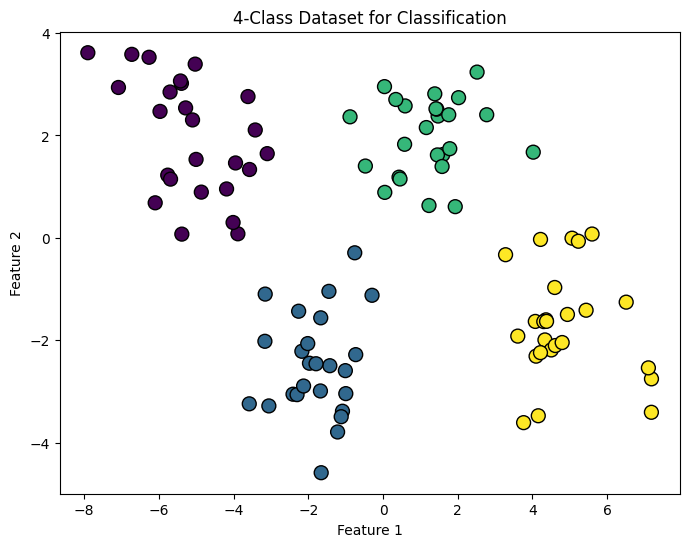

In [123]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=100)
plt.title('4-Class Dataset for Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


In [131]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0902
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.8484
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6766
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4833
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3510
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2365
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1463
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0773
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0242
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9843
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9482
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.9162
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

Testing our Model

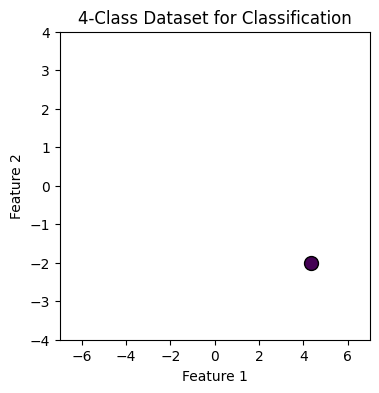

1/1 [==============================] - 0s 17ms/step
True Category: 3, predicted category: 3


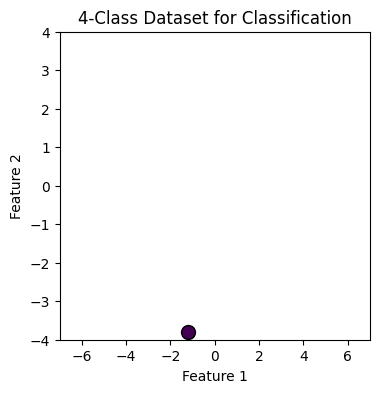

1/1 [==============================] - 0s 18ms/step
True Category: 1, predicted category: 1


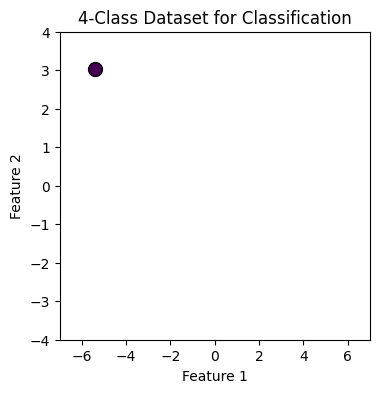

1/1 [==============================] - 0s 38ms/step
True Category: 0, predicted category: 0


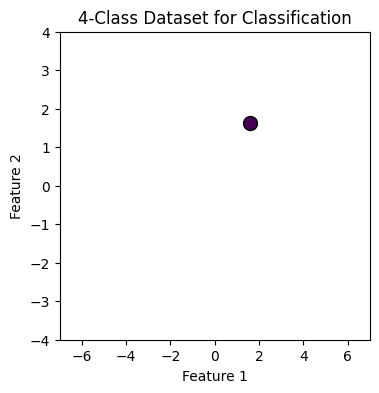

1/1 [==============================] - 0s 25ms/step
True Category: 2, predicted category: 2


In [198]:

test_set = [0,11,3,8]
for i in test_set:
    plt.figure(figsize=(4, 4))
    plt.scatter(X_train[i, 0], X_train[i, 1], c=y_train[i], marker='o', edgecolor='k', s=100)
    plt.xlim(-7, 7) 
    plt.ylim(-4, 4) 
    plt.title('4-Class Dataset for Classification')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.show()
    # print(np.array([X_train[i]]))

    y_hat = model.predict(np.array([X_train[i]]))
    print( f"True Category: {y_train[i]}, predicted category: {tf.argmax(y_hat, axis=1).numpy()[0]}")

# 4 - Linear Model Evaluation

In [ ]:
x = np.array([1651.00,1691.82,1732.63,1773.45,1814.27,1855.08,1895.90,1936.71,1977.53,2018.35,2059.16,2099.98,2140.80,2181.61,2222.43,2263.24,2304.06,2344.88,2385.69,2426.51,2467.33,2508.14,2548.96,2589.78,2630.59,2671.41,2712.22,2753.04,2793.86,2834.67,2875.49,2916.31,2957.12,2997.94,3038.76,3079.57,3120.39,3161.20,3202.02,3242.84,3283.65,3324.47,3365.29,3406.10,3446.92,3487.73,3528.55,3569.37,3610.18,3651.00])
y = np.array([432.65,454.94,471.53,482.51,468.36,482.15,540.02,534.58,558.35,566.42,581.40,596.46,596.71,619.45,616.58,653.16,666.52,670.59,669.02,678.91,707.44,710.76,745.19,729.85,743.80,738.20,772.95,772.22,784.21,776.43,804.78,833.27,825.69,821.05,833.82,833.06,825.70,843.58,869.40,851.50,863.18,853.01,877.16,863.74,874.67,877.74,874.11,882.80,910.83,897.42])
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")



the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


C:\Users\Dell\AppData\Local\Temp\ipykernel_15428\1054714242.py:1: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, marker='x', edgecolor='k')


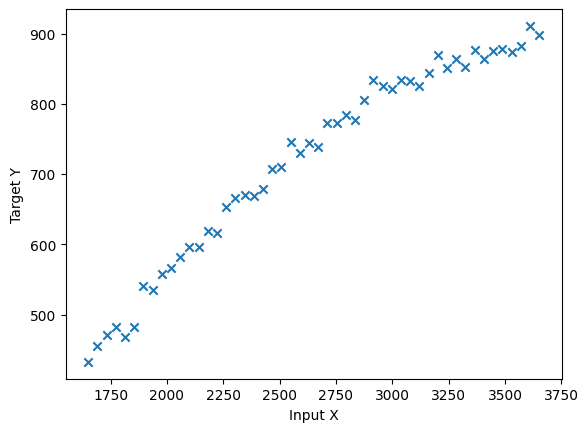

In [208]:
plt.scatter(x, y, marker='x', edgecolor='k')
plt.xlabel('Input X')
plt.ylabel('Target Y')

plt.show()

Split the dataset into training, cross validation, and test sets

In [209]:
X_train, X_, Y_train, Y_ = train_test_split(x, y, test_size = 0.4, random_state = 1)

X_cv, X_test, Y_cv, Y_test = train_test_split(X_, Y_, test_size = 0.5, random_state = 1)

del X_, Y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {Y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {Y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {Y_test.shape}")


the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


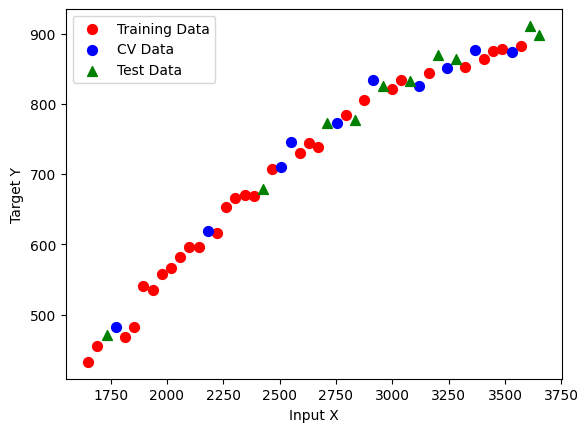

In [221]:
plt.scatter(X_train, Y_train, c="r", s = 50, label="Training Data")
plt.scatter(X_cv, Y_cv, c="b",marker='o', s = 50, label="CV Data")
plt.scatter(X_test, Y_test, c="g",marker='^', s = 50, label="Test Data")
plt.xlabel('Input X')
plt.ylabel('Target Y')

plt.legend()
plt.show()

First solution : Normalize the dataset

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


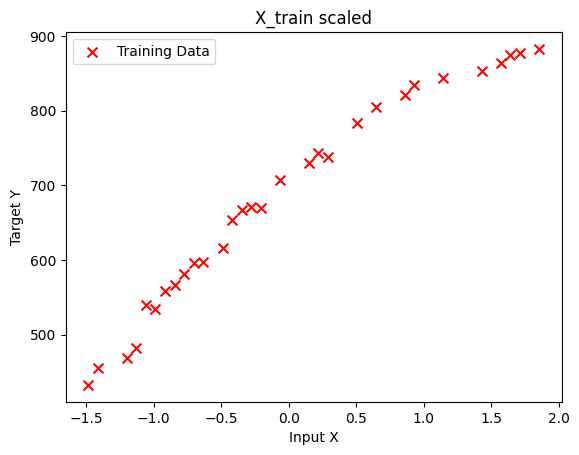

In [226]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler.scale_.squeeze():.2f}")

plt.scatter(X_train_scaled, Y_train, c="r", marker = 'x', s = 50, label="Training Data")
plt.title("X_train scaled")
plt.xlabel('Input X')
plt.ylabel('Target Y')

plt.legend()
plt.show()

Train our model

In [ ]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, Y_train)

LinearRegression()

Now we can evaluate our model

firstly we evaluate our training error

In [ ]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

cost = 0
for i in range(len(yhat)):
    cost += (Y_train[i]-yhat[i])**2
    
cost = cost / (len(yhat)*2)

print(f"train MSE (using for loop): {cost.squeeze()}")

print(f"train MSE (using sklearn function): {mean_squared_error(Y_train,yhat)/2}")


train MSE (using for loop): 406.1814264310124
train MSE (using sklearn function): 406.18142643101237


then we evaluate our cross validation error

In [237]:
X_cv_scaled = scaler.transform(X_cv)

yhat = linear_model.predict(X_cv_scaled)

print(f"Cross validation MSE: {mean_squared_error(Y_cv, yhat) / 2}")

Cross validation MSE: 551.7633686764407


Second solution : Add polynominal features (and normalize the data)

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_mapped = poly.fit_transform(X_train)

scaler_poly = StandardScaler()
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

model = LinearRegression()
model.fit(X_train_mapped_scaled,Y_train)

# Compute MSE for training data
yhat = model.predict(X_train_mapped_scaled)
print(f"train MSE (using sklearn function): {mean_squared_error(Y_train,yhat)/2}")

# Add polynominal features and scale the cross validation data
X_cv_mapped = poly.transform(X_cv)
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute MSE for CV data
yhat = model.predict(X_cv_mapped_scaled)
print(f"CV MSE (using sklearn function): {mean_squared_error(Y_cv,yhat)/2}")

train MSE (using sklearn function): 49.115763074720526
train MSE (using sklearn function): 87.694664384358


We can notice that adding polynominal features decreased the MSE for both training and CV datasets, but we polynominal degree is the best for our model

We can test that using a for loop to figure our the smallest MSE

In [250]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []
degrees = range(1,11)

for d in degrees:
    poly = PolynomialFeatures(degree = d, include_bias = False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)

    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    model = LinearRegression()
    model.fit(X_train_mapped_scaled,Y_train)
    models.append(model)

    # Compute MSE for training data
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(Y_train,yhat)/2
    train_mses.append(train_mse)

    # Add polynominal features and scale the cross validation data
    X_cv_mapped = poly.transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute MSE for CV data
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(Y_cv,yhat)/2
    cv_mses.append(cv_mse)

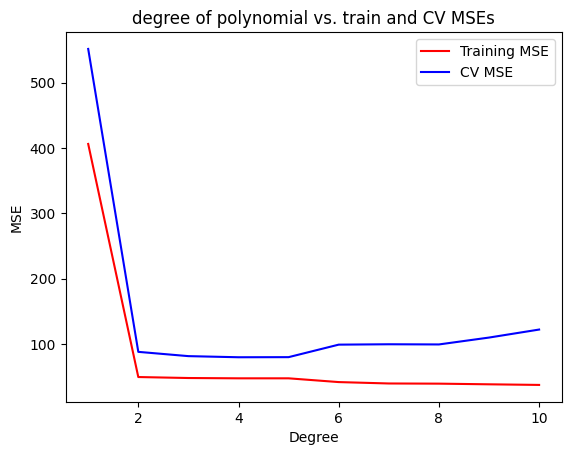

In [257]:
plt.plot(degrees, train_mses, c="r", label="Training MSE")
plt.plot(degrees, cv_mses, c="b", label="CV MSE")
plt.title("degree of polynomial vs. train and CV MSEs")
plt.xlabel('Degree')
plt.ylabel('MSE')

plt.legend()
plt.show()

Finally we can evaluate the model with lowest CV MSE

In [ ]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree = {degree}")

Lowest CV MSE is found in the model with degree=4


Use this degree on our testing data

In [264]:
X_test_mapped = polys[degree-1].transform(X_test)
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

yhat = models[degree - 1].predict(X_test_mapped_scaled)

test_mse = mean_squared_error(Y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.42
Test MSE: 104.64


# 4 - Decision Trees

Prepare dataset

In [ ]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
[0, 1, 0],
[1, 0, 1],
[1, 1, 1],
[1, 1, 0],
[0, 0, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

Compute Entropy

In [285]:
def entropy(z):
    if z == 1 or z == 0:
        return 0
    else:
        return (-z * np.log2(z) - (1 - z) * np.log2(1 - z))

print(entropy(0.5))

1.0


In [288]:
def split_indices(X, index_feature):
    """
    splits given dataset based on a certain feature

    Args:
        X (array (m,n)): data set of m samples with n features
        index_feature (scalar): index of feature upon which we split
        
    Returns:
        left_indices (array(m,)): indices of elements with +ve value for the feature
        right_indices (array(m,)): indices of elements with -ve value for the feature
    """
    left_indices = []
    right_indices = []
    
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    
    return left_indices, right_indices

split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [290]:
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_l = len(left_indices) / len(X)
    w_r = len(right_indices) / len(X)
    
    p_l = sum(y[left_indices]) / len(left_indices)
    p_r = sum(y[right_indices]) / len(right_indices)
    
    weighted_entropy = w_l * entropy(p_l) + w_r * entropy(p_r)
    return weighted_entropy

In [291]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

In [292]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y) / len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X, y, left_indices, right_indices)
    
    return h_node - w_entropy

information_gain(X_train, y_train, left_indices, right_indices)

0.2780719051126377

In [298]:
information_gains = []
features = ['First feature', 'Second feature', 'Third feature']
for i, feature_name in enumerate(features):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")
    information_gains.append(i_gain)

print(f"\nThe Best feature to split on the dataset is {features[np.argmax(information_gains)]}")

Feature: First feature, information gain if we split the root node using this feature: 0.28
Feature: Second feature, information gain if we split the root node using this feature: 0.03
Feature: Third feature, information gain if we split the root node using this feature: 0.12

The Best feature to split on the dataset is First feature


# 5 - Trees Ensemble

Load the dataset

In [4]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


One-hot encoding using Pandas

In [5]:
# specify categorical variables because weneed to one-hot encode them
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is

df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [6]:
# remove the index of target variable
features = [x for x in df.columns if x not in 'HeartDisease']
print(len(features))

20


Split the dataset

In [7]:
X_train, X_val, y_train, y_val = train_test_split(df[features],df['HeartDisease'], train_size = 0.8, random_state = 55)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


Build our model

In [8]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

Test our model against different min splits

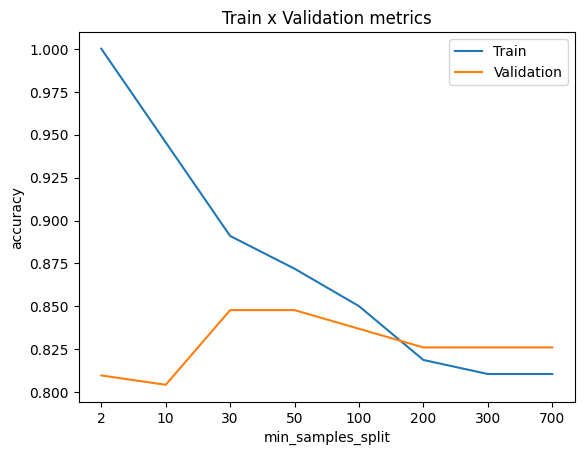

In [9]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 55).fit(X_train,y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
    

Test our model against different max depths

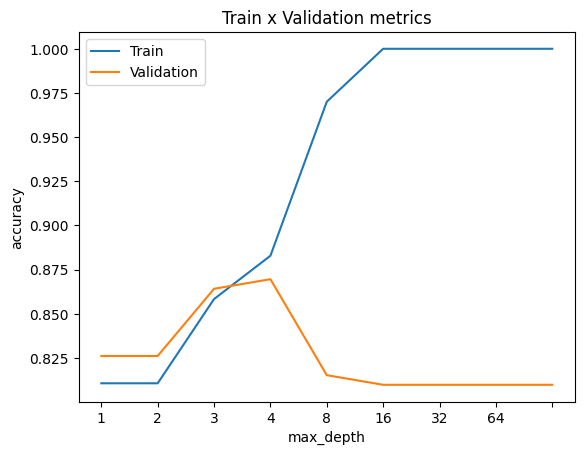

In [10]:
accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 55).fit(X_train,y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)
    
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
    

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 4`
- `min_samples_split = 50` 

In [11]:
decision_tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 50, random_state = 55).fit(X_train, y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8665
Metrics validation:
	Accuracy score: 0.8696


# 6 - Random Forest

In [12]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

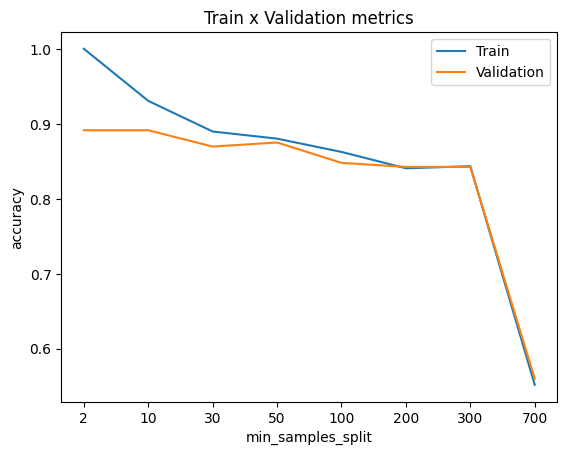

In [13]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 55).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

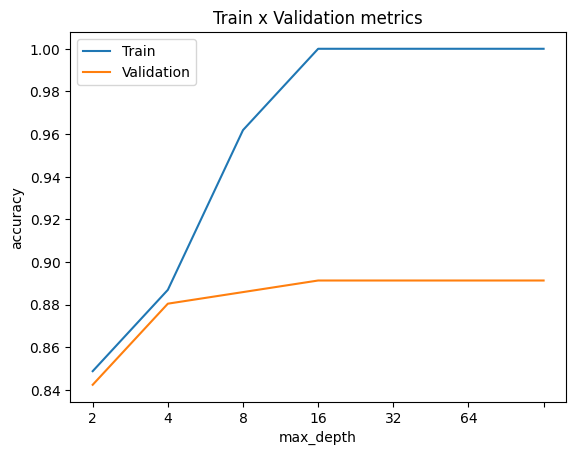

In [14]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 55).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

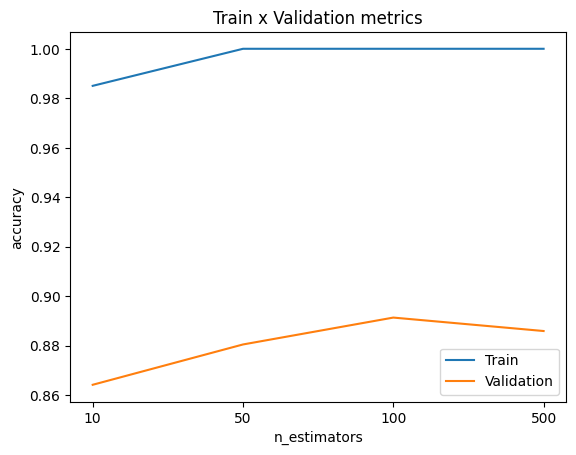

In [15]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 55).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

Let's then fit a random forest with the following parameters:

- max_depth: 16
- min_samples_split: 10
- n_estimators: 100

In [16]:
random_forest_model = RandomForestClassifier(max_depth=16, min_samples_split=10, n_estimators=100).fit(X_train, y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9360
Metrics test:
	Accuracy score: 0.8859


# 7 - XGBoost

One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form (X_val,y_val).

- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop.
- More iterations lead to more estimators, and more estimators can result in overfitting.
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

First, let's define a subset of our training set (we should not use the test set here).

In [17]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [24]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = 55,early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554
[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [25]:
xgb_model.best_iteration

17

In [26]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8533
